In [56]:
# import module minidom, import library matplotlib.
from xml.dom import minidom
import matplotlib.pyplot as plt
file = minidom.parse('hw2-patients.xml')
models = file.getElementsByTagName('patient')

In [57]:
# create a list age, to save ages of all patients.
age = []
# use for loop to traverse all the attributes age, which is saved into the list age.
for elem in models:
    # use float() to transfer string into float, and saved into the list age.
    age_value = float(elem.attributes['age'].value)
    age.append(age_value)

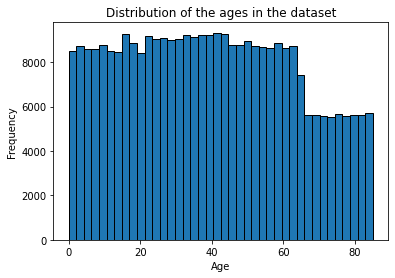

In [58]:
# import libraries matplotlib.
import matplotlib
import matplotlib.pyplot as plt
# use matplotlib.pyplot to draw the histagram of ages. use .xlabel, .ylabel, .title to set the x-axis label, y-axis label and figure title.
plt.hist(age, bins = 40, edgecolor = "black")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Distribution of the ages in the dataset")
plt.show()

In [59]:
# define the function share_same_age().
def share_same_age():
    # use if/else statement to determine whether the length of list age equals to that of set age: 
    # If the length are the same, there are no patients share the same age. Otherwise there are at least two patients share the same age.
    if len(age)!=len(set(age)):
        print("There are some patients share the same age.")
    else: 
        print("No patients share the same age.")

share_same_age()

No patients share the same age.


In [107]:
# create a list gender, to save genders of all patients.
gender = []
# use for loop to traverse all the attributes gender, which is saved into the list gender.
for elem in models:
    gender_value = elem.attributes['gender'].value
    gender.append(gender_value)

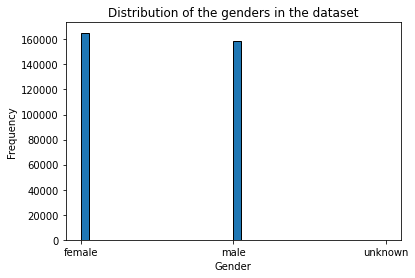

In [108]:
# use matplotlib.pyplot to draw the histagram of genders. use .xlabel, .ylabel, .title to set the x-axis label, y-axis label and figure title.
plt.hist(gender, bins = 40, edgecolor = "black")
plt.xlabel("Gender")
plt.ylabel("Frequency")
plt.title("Distribution of the genders in the dataset")
plt.show()

In [62]:
# use for loop to traverse all the attributes name, which is saved into the list name.
name = []
for elem in models:
    name_value = elem.attributes['name'].value
    name.append(name_value)

In [63]:
# use zip function to store age and name of the patients in a list age_name_tuple.
age_name_tuple = zip(age,name)
# use sorted function to sort the patients by age, and store the sorted result into the list age_sorted_result.
age_sorted_result = sorted(age)

In [64]:
# use for loop to traverse all the attribute age.
for elem in models:
# use if/else: 
# If the value of this element's attribute age equals to the last element in the list age_sorted_result(the oldest age), print this element's attribute name.
    if float(elem.attributes['age'].value) == age_sorted_result[-1]:
        print (f"Name of the oldest person is {elem.attributes['name'].value}.")

Name of the oldest person is Monica Caponera.


In [65]:
# use sorted function to sort the tuple by ages.
tuple_sorted_by_age1 = sorted(age_name_tuple, key = lambda t:t[0]) 

In [75]:
# define the function bisection, which is used to identify the patient with known age using bisection.
def bisection(list,found_age):
    # set mid as global variable.
    global mid
    # variables low and high are used to define the search range.
    low = 0
    high = len(list) - 1
    while (low < high):
        # variable mid is in the middle of each search range, used to compare with found_age.
        mid = round((low + high)/2)
        # if found_age is bigger than the element in the middle of the sorted list, only need to compare found_age with the elements on the right side.
        if list[mid][0] < found_age:
            low = mid + 1
        # if found_age is samller than the element in the middle of the sorted list, only need to compare found_age with the elements on the left side.
        elif list[mid][0] > found_age:
            high = mid - 1
        # if found_age is exactly the element in the middle of the sorted list, mid is the index of found_age and name of the corresponding patient.
        elif list[mid][0] == found_age:
            break
    return mid

bisection(tuple_sorted_by_age1,41.5)
print(f"The patient who is 41.5 years old is {tuple_sorted_by_age1[mid][1]}.")


The patient who is 41.5 years old is John Braswell.


In [67]:
# the number of patients over found_age is the length of the sorted tuple sustract index of the patient whose age is found_age.
num_patient_over_age = len(tuple_sorted_by_age1) - mid
print(f"The number of patients who are at least 41.5 years old is {num_patient_over_age}.")

The number of patients who are at least 41.5 years old is 150471.


In [128]:
# define the function bisection_age_range, which is used to return the number of patients who are in the age range [low_age, high_age).
def bisection_age_range(list,low_age,high_age,str):
    global count
    # run bisection for two times, to get the index of low_age and high_age.
    low_age_pos = bisection(list,low_age)
    high_age_pos = bisection(list,high_age)
    # the number of patients who are in the age range [low_age, high_age) is the index of high_age substract that of low_age.
    count = high_age_pos - low_age_pos
    print(f"The number of {str} patients who are at least {low_age} years old but are strictly less than {high_age} years old is {count}.")
    # return the number of patients who are in the age range [low_age, high_age).
    return count

In [131]:
# define function for_loop_age_range(), get the number of patients whose age is in the range(low_age, high_age) by traversing the whole list.
def for_loop_age_range(list,low_age,high_age):
    # variable count is the number of patients who are in the age range.
    count = 0
    # use for loop to traverse the elements in the list.
    for i in range(0,len(list)):
        # use if/else statement:
        # if the element in the list is in the age range(low_age,high_age), it is counted.
        if list[i][0] < high_age and list[i][0] >= low_age:
            count = count + 1
    print (f"The number of all patients who are at least {low_age} years old but are strictly less than {high_age} years old is {count}.")

In [132]:
# import module time to record the running time.
import time
def comparison_for_loop_and_bisection(list,low_age,high_age):
    # run function for_loop_age_range and record the running time.
    start_for_loop = time.time()
    for_loop_age_range(list,low_age,high_age)
    end_for_loop = time.time()
    print (f"The time usage of function for_loop_age_range is {end_for_loop - start_for_loop} seconds.")

    # run function bisection_age_range and record the running time.
    start_bisection = time.time()
    bisection_age_range(list,low_age,high_age,'all')
    end_bisection = time.time()
    print (f"The time usage of function bisection_age_range is {end_bisection-start_bisection} seconds.")

In [130]:
comparison_for_loop_and_bisection(tuple_sorted_by_age1,40,60)
comparison_for_loop_and_bisection(tuple_sorted_by_age1,50,70)
comparison_for_loop_and_bisection(tuple_sorted_by_age1,80,100)
comparison_for_loop_and_bisection(tuple_sorted_by_age1,10,70)
comparison_for_loop_and_bisection(tuple_sorted_by_age1,20,60)

The number of patients who are at least 40 years old but are strictly less than 60 years old is 83688.
The time usage of function for_loop_age_range is 0.08601856231689453 seconds.
The number of all patients who are at least 40 years old but are strictly less than 60 years old is 83688.
The time usage of function bisection_age_range is 0.0 seconds.
The number of patients who are at least 50 years old but are strictly less than 70 years old is 74894.
The time usage of function for_loop_age_range is 0.08101820945739746 seconds.
The number of all patients who are at least 50 years old but are strictly less than 70 years old is 74894.
The time usage of function bisection_age_range is 0.0 seconds.
The number of patients who are at least 80 years old but are strictly less than 100 years old is 13316.
The time usage of function for_loop_age_range is 0.08401894569396973 seconds.
The number of all patients who are at least 80 years old but are strictly less than 100 years old is 13316.
The time

In [133]:
# use zip function to store age and gender of the patients in a list age_gender_tuple.
age_gender_tuple = zip(age,gender)
# use sorted function to sort the tuple by ages, save into the list tuple_sorted_by_age2.
tuple_sorted_by_age2  = sorted(age_gender_tuple, key = lambda t:t[0])

# create a list list_male, to save the ages and genders of males in tuple_sorted_by_age2.
list_male = []
for i in range(0,len(tuple_sorted_by_age2)):
    if tuple_sorted_by_age2[i][1] == 'male':
        list_male.append(tuple_sorted_by_age2[i])

In [137]:
# define function bisection_age_range_and_male(), which is used to return both the total number of patients in an age range and the number of males in the age range.
def bisection_age_range_and_male(list,list_male,low_age,high_age):
    bisection_age_range(list,low_age,high_age,'all')
    bisection_age_range(list_male,low_age,high_age,'male')

In [140]:
# define function for_loop_age_range_and_male(), which is used to test the results of bisection_age_range_and_male().
def for_loop_age_range_and_male(list,low_age,high_age):
    # creat variable count to save the number of patients in the age range [low_age,high_age).
    count = 0
    for i in range(0,len(list)):
        # use if/else statement:
        # if the element in the list is in the age range [low_age,high_age), it is counted.
        if list[i][0] < high_age and list[i][0] >= low_age:
            count = count + 1
    print (f"The number of patients who are at least {low_age} years old but are strictly less than {high_age} years old is {count}.")
    
    # creat variable count to save the number of male patients in the age range [low_age,high_age).
    count_male = 0
    for i in range(0,len(list_male)):
        # use if/else statement:
        # if the element in the list is in the age range [low_age,high_age), it is counted.
        if list_male[i][0] < high_age and list_male[i][0] >= low_age:
            count_male = count_male + 1
    print (f"The number of patients who are at least {low_age} years old but are strictly less than {high_age} years old is {count_male}.")

In [146]:
bisection_age_range_and_male(tuple_sorted_by_age2,list_male,50,70)
for_loop_age_range_and_male(tuple_sorted_by_age2,50,70)

bisection_age_range_and_male(tuple_sorted_by_age2,list_male,20,60)
for_loop_age_range_and_male(tuple_sorted_by_age2,20,60)

bisection_age_range_and_male(tuple_sorted_by_age2,list_male,33,77)
for_loop_age_range_and_male(tuple_sorted_by_age2,33,77)

The number of all patients who are at least 50 years old but are strictly less than 70 years old is 74894.
The number of male patients who are at least 50 years old but are strictly less than 70 years old is 35768.
The number of patients who are at least 50 years old but are strictly less than 70 years old is 74894.
The number of patients who are at least 50 years old but are strictly less than 70 years old is 35768.
The number of all patients who are at least 20 years old but are strictly less than 60 years old is 169212.
The number of male patients who are at least 20 years old but are strictly less than 60 years old is 83542.
The number of patients who are at least 20 years old but are strictly less than 60 years old is 169212.
The number of patients who are at least 20 years old but are strictly less than 60 years old is 83542.
The number of all patients who are at least 33 years old but are strictly less than 77 years old is 166080.
The number of male patients who are at least 33 